# YOLOv5 Object Detection for Solar Panel Anomalies

## Introduction

In the world of solar power, it's really important to spot any problems with solar panels quickly. YOLOv5 is a smart tool that helps us do just that.


We're using YOLOv5 to scan pictures of solar panels. We will train the model so that it could tell us the below characterisitc associated with a solar panel. We're training it with infrared pictures with following attributes: 

These characteristics/attributes include:
- **Cell**:  Represents individual solar cells within a solar panel.

- **Cell-Multi**: Denotes multiple solar cells within a single panel.
- **No-Anomaly**: Indicates areas of the solar panel without any anomalies or issues.
- **Shadowing**: Refers to shadows cast on the solar panel surface.
- **Unclassified**:  Represents regions that cannot be categorized into the above classes.



# Step 1: Clone github repository to use Yolo

#### **Clone the Github Repo (Default location /root/)**

In [2]:
!pwd

/root/42028/AT2/AT2-Part2/ObjectDetection-Yolo/yolov5


In [4]:
# By Default Cloned under root
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16582, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 16582 (delta 30), reused 39 (delta 18), pack-reused 16522
Receiving objects: 100% (16582/16582), 15.11 MiB | 10.64 MiB/s, done.
Resolving deltas: 100% (11383/11383), done.
Updating files: 100% (148/148), done.


In [2]:
%cd /root/AT2/AT2-Part2/ObjectDetection-Yolo

[Errno 2] No such file or directory: '/root/AT2/AT2-Part2/ObjectDetection-Yolo'
/root/42028/AT2/AT2-Part2/ObjectDetection-Yolo/yolov5


#### Installing the required packages. 

In [ ]:
%cd yolov5

In [3]:
!pip install -r requirements.txt

  Using cached GitPython-3.1.43-py3-none-any.whl (207 kB)
  Using cached pillow-10.3.0-cp39-cp39-manylinux_2_28_x86_64.whl (4.5 MB)
  Using cached thop-0.1.1.post2209072238-py3-none-any.whl (15 kB)
  Using cached ultralytics-8.2.12-py3-none-any.whl (756 kB)
  Using cached gitdb-4.0.11-py3-none-any.whl (62 kB)
  Using cached smmap-5.0.1-py3-none-any.whl (24 kB)
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0

[notice] A new release of pip is available: 23.0 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [5]:
!pip install yolov5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.4/953.4 kB 9.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 6.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 32.6 MB/s eta 0:00:0000:01:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 2.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 1.2 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 1.4 MB/s eta 0:00:00ta 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 3.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 27.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 1.2 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 3.9 MB

Install the required libraries

In [6]:

from yolov5 import utils
#display = utils.notebook_init()  # checks Pytorch and GPU used


/opt/conda/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### **Configuring the YAML File**

#### Default configuration

In [7]:
#@title Setup Training YAML File
number_of_classes = 6 #@param {type:"integer"}
with open('new_train_yaml', 'w+') as file:
    file.write(
        f"""
        # parameters
        nc: {number_of_classes}  # number of classes
        depth_multiple: 0.33  # model depth multiple
        width_multiple: 0.50  # layer channel multiple

        # anchors
        anchors:
          - [10,13, 16,30, 33,23]  # P3/8
          - [30,61, 62,45, 59,119]  # P4/16
          - [116,90, 156,198, 373,326]  # P5/32

        # YOLOv5 backbone
        backbone:
          # [from, number, module, args]
          [[-1, 1, Focus, [64, 3]],  # 0-P1/2
           [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
           [-1, 3, BottleneckCSP, [128]],
           [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
           [-1, 9, BottleneckCSP, [256]],
           [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
           [-1, 9, BottleneckCSP, [512]],
           [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
           [-1, 1, SPP, [1024, [5, 9, 13]]],
           [-1, 3, BottleneckCSP, [1024, False]],  # 9
          ]

        # YOLOv5 head
        head:
          [[-1, 1, Conv, [512, 1, 1]],
           [-1, 1, nn.Upsample, [None, 2, 'nearest']],
           [[-1, 6], 1, Concat, [1]],  # cat backbone P4
           [-1, 3, BottleneckCSP, [512, False]],  # 13

           [-1, 1, Conv, [256, 1, 1]],
           [-1, 1, nn.Upsample, [None, 2, 'nearest']],
           [[-1, 4], 1, Concat, [1]],  # cat backbone P3
           [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

           [-1, 1, Conv, [256, 3, 2]],
           [[-1, 14], 1, Concat, [1]],  # cat head P4
           [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

           [-1, 1, Conv, [512, 3, 2]],
           [[-1, 10], 1, Concat, [1]],  # cat head P5
           [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

           [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
          ]
        """
    )

### **Unzipping the dataset**

In [9]:
!pwd
%cd data

/root/42028/AT2/AT2-Part2/ObjectDetection-Yolo/yolov5
/root/42028/AT2/AT2-Part2/ObjectDetection-Yolo/yolov5/data


In [10]:
!unzip yolo.zip

Archive:  yolo.zip
   creating: yolo/
  inflating: __MACOSX/._yolo         
   creating: yolo/valid/
  inflating: __MACOSX/yolo/._valid   
  inflating: yolo/.DS_Store          
  inflating: __MACOSX/yolo/._.DS_Store  
   creating: yolo/test/
  inflating: __MACOSX/yolo/._test    
  inflating: yolo/data.yaml          
  inflating: __MACOSX/yolo/._data.yaml  
   creating: yolo/train/
  inflating: __MACOSX/yolo/._train   
  inflating: yolo/README.txt         
  inflating: __MACOSX/yolo/._README.txt  
   creating: yolo/valid/images/
  inflating: __MACOSX/yolo/valid/._images  
   creating: yolo/valid/labels/
  inflating: __MACOSX/yolo/valid/._labels  
  inflating: yolo/test/.DS_Store     
  inflating: __MACOSX/yolo/test/._.DS_Store  
   creating: yolo/test/images/
  inflating: __MACOSX/yolo/test/._images  
   creating: yolo/test/labels/
  inflating: __MACOSX/yolo/test/._labels  
   creating: yolo/train/images/
  inflating: __MACOSX/yolo/train/._images  
   creating: yolo/train/labels/
  infl

In [12]:
%cd ..

/root/42028/AT2/AT2-Part2/ObjectDetection-Yolo/yolov5


#### We will now setup Dataset paths

In [8]:
#@title Setup Dataset Configuration (Data.yaml)
train_data_dir = "/root/42028/AT2/AT2-Part2/ObjectDetection-Yolo/yolov5/data/yolo/train" #@param {type:"string"}
val_data_dir = "//root/42028/AT2/AT2-Part2/ObjectDetection-Yolo/yolov5/data/yolo/train" #@param {type:"string"}
class_names = ["Cell", "Cell-Multi", "No-Anomaly", "Shadowing", "Unclassified", ""] #@param {type:"raw"}
with open('new_data_yaml', 'w+') as file:
    file.write(
        f"""
        train: {train_data_dir}
        val: {val_data_dir}

        nc: {number_of_classes}
        names: {class_names}
        """
    )

#### Start Training

**Configuation to try:**

*   **Image Size**: 416
*   **Batch Size**: 16
*   **Epochs**: 600
*   **Data Source details** : new_data_yaml 
*   **Training details** : new_train_yaml 


In [ ]:
!python /root/42028/AT2/AT2-Part2/ObjectDetection-Yolo/yolov5/train.py --epochs 600 --img 416 --batch 16 --data /root/42028/AT2/AT2-Part2/ObjectDetection-Yolo/yolov5/new_data_yaml --cfg /root/42028/AT2/AT2-Part2/ObjectDetection-Yolo/yolov5/new_train_yaml

train: weights=yolov5s.pt, cfg=/root/42028/AT2/AT2-Part2/ObjectDetection-Yolo/yolov5/new_train_yaml, data=/root/42028/AT2/AT2-Part2/ObjectDetection-Yolo/yolov5/new_data_yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=600, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-307-g920c721e Python-3.9.16 torch-1.13.1+cu117 CUDA:0 (Tesla T4, 14931MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentu

#### We ran the model for 600 epochs. Unfortunately, AWS console logged me out and the logging stopped after 556 epochs although the training did finish at 600. 


#### So we resumed training for another 200 epochs from tha last weights stored in the weights folder. 

In [28]:
!python /root/42028/AT2/AT2-Part2/ObjectDetection-Yolo/yolov5/train.py --epochs 200 --img 416 --batch 16 --data /root/42028/AT2/AT2-Part2/ObjectDetection-Yolo/yolov5/new_data_yaml --cfg /root/42028/AT2/AT2-Part2/ObjectDetection-Yolo/yolov5/new_train_yaml --weights /root/42028/AT2/AT2-Part2/ObjectDetection-Yolo/yolov5/runs/train/exp2/weights/last.pt


train: weights=/root/42028/AT2/AT2-Part2/ObjectDetection-Yolo/yolov5/runs/train/exp2/weights/last.pt, cfg=/root/42028/AT2/AT2-Part2/ObjectDetection-Yolo/yolov5/new_train_yaml, data=/root/42028/AT2/AT2-Part2/ObjectDetection-Yolo/yolov5/new_data_yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-307-g920c721e Python-3.9.16 torch-1.13.1+cu11

# Score Interpretation 
### No-Anomaly class has the highest precision (96.5%) and recall (92.7%), indicating that the model performs exceptionally well in detecting instances of no anomaly.
#### Shadowing class also performs well with high precision (94.1%) and recall (96.2%).
#### Cell-Multi class has relatively lower precision (79.8%) and recall (54.4%), indicating that the model struggles more with accurately detecting instances of this class.
#### Cell class has similar precision (77.5%) and recall (68.1%) to Cell-Multi, indicating some difficulty in detection.
#### Unclassified class has high precision (93.9%) but slightly lower recall (89.5%), suggesting that while the model is good at identifying instances of this class, it might miss some of them.

### **Inference/Testing**
'detect.py' is used to run YOLOv5 testing/inference on different types of inputs such as: image, video, webcam input, directory glob, Youtube, RTSP/RTMP/HTTP Stream.

**Usage Syntax:**

```shell
python detect.py --source 0  # webcam
                          img.jpg  # image 
                          vid.mp4  # video
                          path/  # directory
                          path/*.jpg  # glob
                          'https://youtu.beZgi9g1ksQHc'  # YouTube
                          'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
                 --weights path/to/weights
                 --img 416
                 --conf 0.5
                 --save-txt
```
Example:
```shell
!python ../yolov5/detect.py --source '/path/to/img' --weights 'path/to/weights/best.pt' --img image_size --conf confidence_threshold --save-txt
```

In [29]:
!pwd
!cd ..

/root/42028/AT2/AT2-Part2/ObjectDetection-Yolo/yolov5


In [30]:
## ENTER CODE TO START INFERENCE ON THE IMAGES
!python detect.py --source '/root/42028/AT2/AT2-Part2/ObjectDetection-Yolo/yolov5/data/yolo/test/images/100013.jpg' --weights '/root/42028/AT2/AT2-Part2/ObjectDetection-Yolo/yolov5/runs/train/exp2/weights/last.pt' --img 416 --conf 0.5 --save-txt

detect: weights=['/root/42028/AT2/AT2-Part2/ObjectDetection-Yolo/yolov5/runs/train/exp2/weights/last.pt'], source=/root/42028/AT2/AT2-Part2/ObjectDetection-Yolo/yolov5/data/yolo/test/images/100013.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-307-g920c721e Python-3.9.16 torch-1.13.1+cu117 CUDA:0 (Tesla T4, 14931MiB)

Fusing layers... 
new_train_yaml summary: 182 layers, 7260003 parameters, 0 gradients
image 1/1 /root/42028/AT2/AT2-Part2/ObjectDetection-Yolo/yolov5/data/yolo/test/images/100013.jpg: 352x416 2 Cells, 12 No-Anomalys, 12.1ms
Speed: 0.4ms pre-process, 12.1ms inference, 2.3ms NMS per image at shape (1

#  Display result images

In [31]:
import cv2
from matplotlib import pyplot as plt
from PIL import Image

# This is needed to display the images.
%matplotlib inline

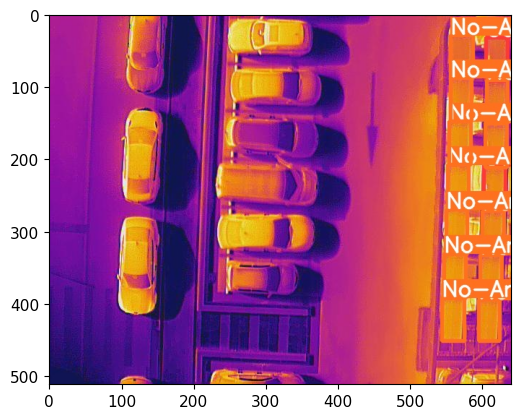

In [32]:
image = Image.open('/root/42028/AT2/AT2-Part2/ObjectDetection-Yolo/yolov5/runs/detect/exp2/100013.jpg')
plt.imshow(image)

# Display performance analysis

Training results are automatically logged to Tensorboard and CSV as `results.csv`, which is plotted as `results.png` (below) after training completes. You can also plot any `results.csv` file manually:

In [17]:
#check the current directory
!pwd

/root/AT3/dataset


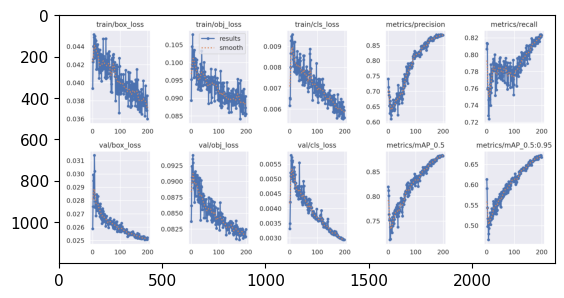

In [34]:
from PIL import Image
import matplotlib.pyplot as plt
image = Image.open('/root/42028/AT2/AT2-Part2/ObjectDetection-Yolo/yolov5/runs/train/exp6/results.png') 
plt.imshow(image)